In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# make a dataframe 
df = pd.DataFrame({
    'X': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'Y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

#convert dataframe into array or you can directly create a np.array
df = np.array(df)

In [3]:
print(df)

[[12 39]
 [20 36]
 [28 30]
 [18 52]
 [29 54]
 [33 46]
 [24 55]
 [45 59]
 [45 63]
 [52 70]
 [51 66]
 [52 63]
 [55 58]
 [53 23]
 [55 14]
 [61  8]
 [64 19]
 [69  7]
 [72 24]]


In [4]:
# To find the best value for k using elbow method
var = []
for i in range(1, 11):
    k_mean = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_mean.fit(df)
    var.append(k_mean.inertia_)

In [5]:
print(var)

[13654.210526315788, 5022.628205128204, 1624.4285714285716, 1081.75, 852.0833333333334, 647.0833333333334, 513.5833333333334, 424.5, 339.08333333333337, 251.83333333333334]


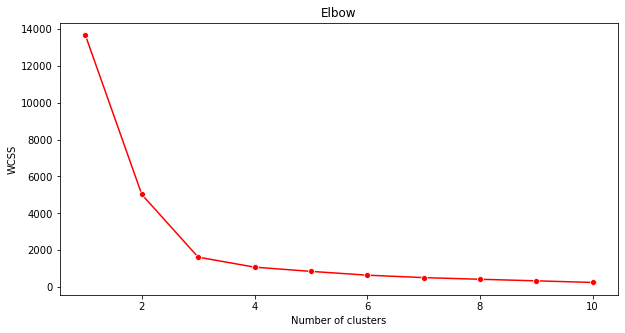

In [6]:
# PLot value of the variation to see best value of k
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), var,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# create object of KMeans model
k_mean = KMeans(n_clusters=3)

# Fit data into the model
k_mean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# Get the centroids
centroids = k_mean.cluster_centers_

In [9]:
print(centroids)

[[62.33333333 15.83333333]
 [50.         63.16666667]
 [23.42857143 44.57142857]]


In [10]:
# See lables
print(k_mean.labels_)

[2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0]


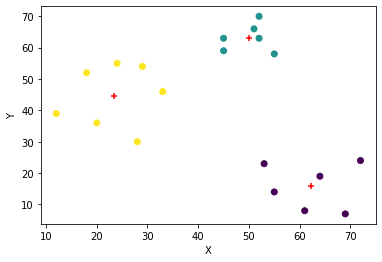

In [11]:
# Plot data points and centroids
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df[:,0], df[:,1], c=k_mean.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="+", color='red')
plt.show()